# Imports

In [2]:
from google.colab import drive
import os

drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/SER_TASK')
os.getcwd()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'/content/drive/MyDrive/SER_TASK'

In [ ]:
from baseline.data import IEMOCAMP_AUDIO
from baseline.baseline_model import CNNNetwork

In [ ]:
import torchaudio
from torch.utils.data import DataLoader
import torch
from torch import nn

In [ ]:
from tqdm import tqdm

In [ ]:
torch.backends.cudnn.benchmark = True

In [ ]:
if torch.cuda.is_available():
    device = "cuda"
else:
    device = "cpu"
print(f"Using {device}")

Using cuda


In [ ]:
"""
Data prep block 
"""
mel_spectrogram = torchaudio.transforms.MelSpectrogram(
    sample_rate=16000,
    n_fft=1024,
    hop_length=512,
    n_mels=64
)

train_data = IEMOCAMP_AUDIO(dataset_path='preprocessed_data/audio_test.csv',
                            transformation=mel_spectrogram,
                            num_samples=32500)

val_test_data = IEMOCAMP_AUDIO(dataset_path='preprocessed_data/audio_test.csv',
                               transformation=mel_spectrogram,
                               num_samples=32500)


val_data, test_data = torch.utils.data.random_split(
     val_test_data,
    [811, 811],
    generator=torch.Generator().manual_seed(33),
)

batch_size = 64
train_dataloader = DataLoader(train_data, batch_size=batch_size)
val_dataloader = DataLoader(val_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=1000)

In [ ]:
def train_single_epoch(model, data_loader, loss_fn, optimiser):
    for X, y in tqdm(data_loader):
        X, y = X.to(device), y.to(device)

        # calculate loss
        prediction = model(X)
        loss = loss_fn(prediction, y)

        # back-propagate error and update weights
        optimiser.zero_grad()
        loss.backward()
        optimiser.step()

    print(f"loss: {loss.item()}")

In [ ]:
"""
Model setup 
"""
cnn = CNNNetwork().to(device)

# initialise loss function + optimiser
loss_fn = nn.CrossEntropyLoss()
optimiser = torch.optim.Adam(cnn.parameters(),
                             lr=1e-3)
cnn

CNNNetwork(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv3): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv4): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear): Linear(in_features=3200, out_features=5, bias=True)
)

In [ ]:
n_epoch = 25
for i in range(n_epoch):
    train_single_epoch(cnn, train_dataloader, loss_fn, optimiser)

100%|██████████| 26/26 [00:03<00:00,  8.09it/s]


loss: 0.5155490636825562


100%|██████████| 26/26 [00:03<00:00,  8.19it/s]


loss: 0.561741292476654


100%|██████████| 26/26 [00:03<00:00,  8.16it/s]


loss: 0.7213616371154785


100%|██████████| 26/26 [00:03<00:00,  8.11it/s]


loss: 0.6898205280303955


100%|██████████| 26/26 [00:03<00:00,  8.10it/s]


loss: 0.48331788182258606


100%|██████████| 26/26 [00:03<00:00,  8.14it/s]


loss: 0.43268632888793945


100%|██████████| 26/26 [00:03<00:00,  8.09it/s]


loss: 0.3742859661579132


100%|██████████| 26/26 [00:03<00:00,  8.14it/s]


loss: 0.2859983742237091


100%|██████████| 26/26 [00:03<00:00,  8.20it/s]


loss: 0.2892388105392456


100%|██████████| 26/26 [00:03<00:00,  8.22it/s]


loss: 0.40749138593673706


100%|██████████| 26/26 [00:03<00:00,  8.09it/s]


loss: 0.8935619592666626


100%|██████████| 26/26 [00:03<00:00,  8.19it/s]


loss: 0.666201651096344


100%|██████████| 26/26 [00:03<00:00,  8.18it/s]


loss: 0.6920661330223083


100%|██████████| 26/26 [00:03<00:00,  8.21it/s]


loss: 0.7238577604293823


100%|██████████| 26/26 [00:03<00:00,  8.14it/s]


loss: 0.24607278406620026


100%|██████████| 26/26 [00:03<00:00,  8.20it/s]


loss: 0.16824154555797577


100%|██████████| 26/26 [00:03<00:00,  8.15it/s]


loss: 0.1389576941728592


100%|██████████| 26/26 [00:03<00:00,  8.20it/s]


loss: 0.11601357907056808


100%|██████████| 26/26 [00:03<00:00,  8.11it/s]


loss: 0.06433109939098358


100%|██████████| 26/26 [00:03<00:00,  8.16it/s]


loss: 0.1875213086605072


100%|██████████| 26/26 [00:03<00:00,  8.17it/s]


loss: 0.08869469910860062


100%|██████████| 26/26 [00:03<00:00,  8.14it/s]


loss: 0.22835654020309448


100%|██████████| 26/26 [00:03<00:00,  8.17it/s]


loss: 0.4056364893913269


100%|██████████| 26/26 [00:03<00:00,  8.16it/s]


loss: 0.051366839557886124


100%|██████████| 26/26 [00:03<00:00,  8.34it/s]

loss: 1.1188300848007202


# Evaluate

In [ ]:
def evaluate(model, valloader):
    model.eval()
    correct, total = 0, 0    
    with torch.no_grad():
        
        for X, y in tqdm(valloader):
            X, y = X.to(device), y.to(device)
            output = model(X)           
            prediction = torch.argmax(output.data, axis=-1)
            total += prediction.shape[0]
            correct += (prediction == y).sum()

    return (correct/total).item(), prediction, y

In [ ]:
acc, prediction, y = evaluate(cnn, val_dataloader)

100%|██████████| 13/13 [00:01<00:00,  8.24it/s]


In [ ]:
print(f'Accuracy on validation set {acc}')

Accuracy on validation set 0.6239210963249207


In [ ]:
acc, prediction, y = evaluate(cnn, test_dataloader)

100%|██████████| 1/1 [00:01<00:00,  1.47s/it]


In [ ]:
print(f'Accuracy on test set {acc}')

Accuracy on test set 0.5930949449539185


In [ ]:
torch.save(cnn.state_dict(), 'baseline/models/audio_baseline.pt')

In [ ]:
X, y = next(iter(test_dataloader))
output =  cnn(X.to(device))
prediction = torch.argmax(output.data, axis=-1)

In [ ]:
from sklearn.metrics import confusion_matrix
#Get the confusion matrix
cf_matrix = confusion_matrix(y.to('cpu'), prediction.to('cpu'))

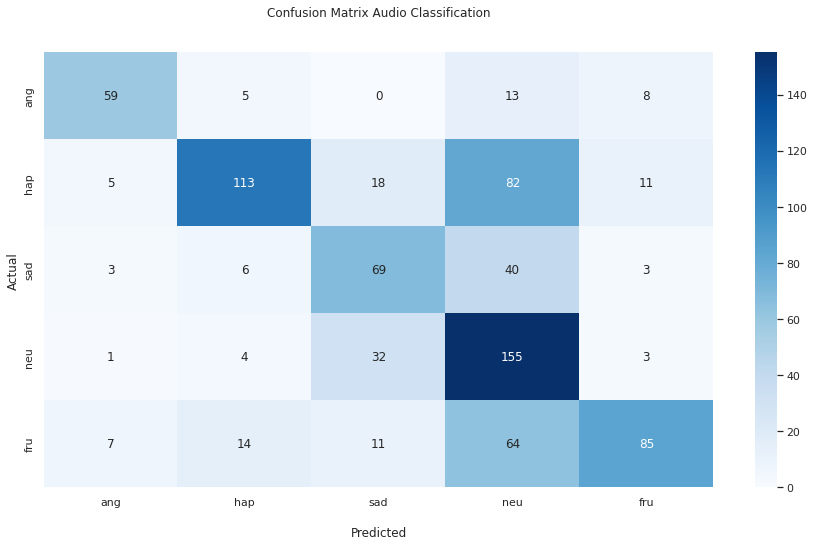

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)})
import seaborn as sns
import matplotlib.pyplot as plt
# sns.heatmap(table2,annot=True,cmap='Blues', fmt='g')
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',  fmt='g')
ax.set_title('Confusion Matrix Audio Classification\n\n');
ax.set_xlabel('\nPredicted')
ax.set_ylabel('Actual');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['ang','hap', 'sad', 'neu', 'fru'])
ax.yaxis.set_ticklabels(['ang','hap', 'sad', 'neu', 'fru'])

## Display the visualization of the Confusion Matrix.
plt.savefig('baseline/images/cls_audio.png')
plt.show()
